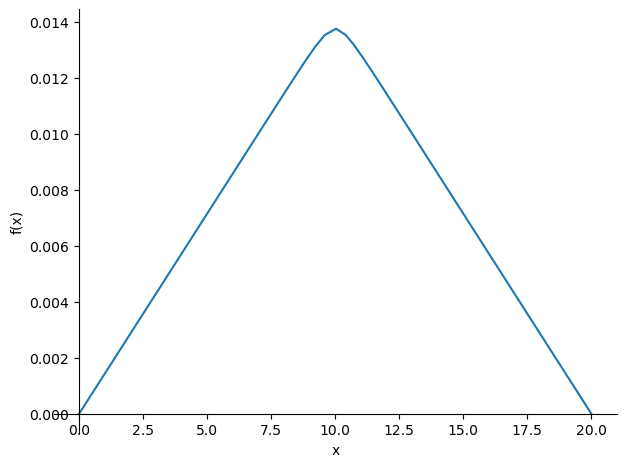

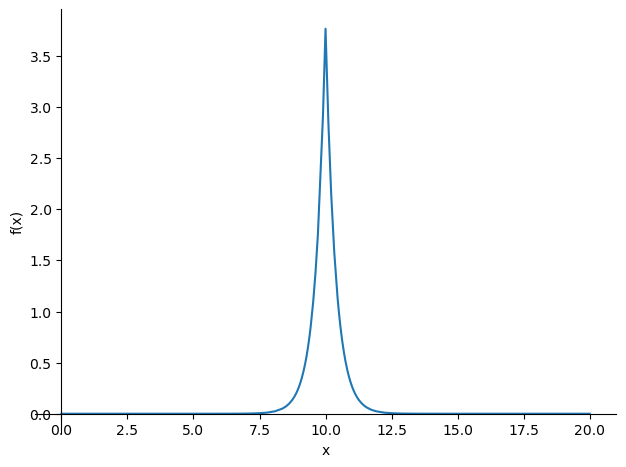

3.77964473009227

In [35]:
import sympy as sp
w = sp.symbols('w', cls=sp.Function)
C1, C2, C3, C4 = sp.symbols('C1 C2 C3 C4')
x, H, EI = sp.symbols('x H EI')

alpha = 1 #with axial deformation
AXexact = 1 #exact formulation of axial deformation
Ec = 30e3
Ac = 2500*280
EA = Ac*Ec/1000 #kN
L = 10
F0 = 10
EI = 1000
H = 7000
q = sp.nsimplify(2.5*28*0.28) #nsimplify to get rid of floats (difficult for integration)

diffeq = sp.Eq(EI*sp.diff(w(x),x,4)-H*sp.diff(w(x),x,2),2*F0*sp.DiracDelta(x-L))
#display(diffeq)

w = sp.dsolve(diffeq)
w = w.rhs
#display(w)

phi = -sp.diff(w, x)
kappa = sp.diff(phi, x)
M = EI * kappa
V = sp.diff(M, x)

eq1  = sp.Eq(w.subs(x , 0) , 0)
eq2  = sp.Eq(M.subs(x , 0) , 0)
eq3  = sp.Eq(w.subs(x , 2*L) , 0)
eq4  = sp.Eq(M.subs(x , 2*L) , 0)

sol = sp.solve((eq1,eq2,eq3,eq4) ,
               (C1 ,C2 ,C3 ,C4))
w_sol = w.subs(sol)
M_sol = M.subs(sol)
#display(w_sol)
#display(M_sol)

sp.plotting.plot(w_sol,(x,0,2*L))
sp.plotting.plot(M_sol,(x,0,2*L))